In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [37]:
start = '2010-01-01'
end = '2023-12-21'
stock = 'AAPL'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [39]:
data.reset_index(inplace=True)

In [40]:
ma_100_days = data.Close.rolling(100).mean()

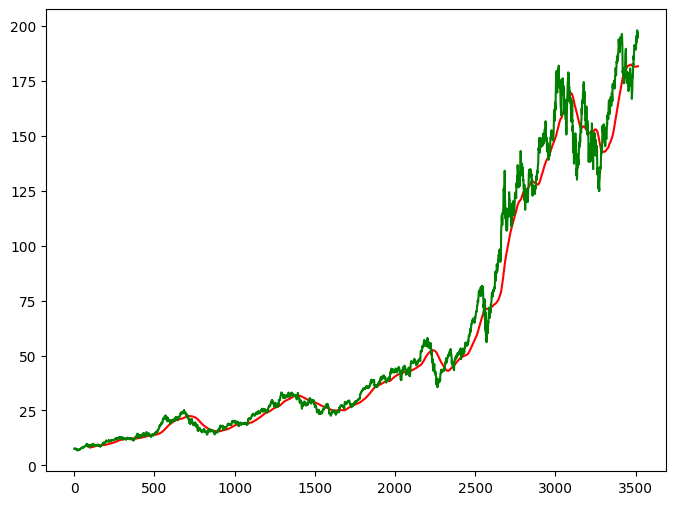

In [41]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [42]:
ma_200_days = data.Close.rolling(200).mean()

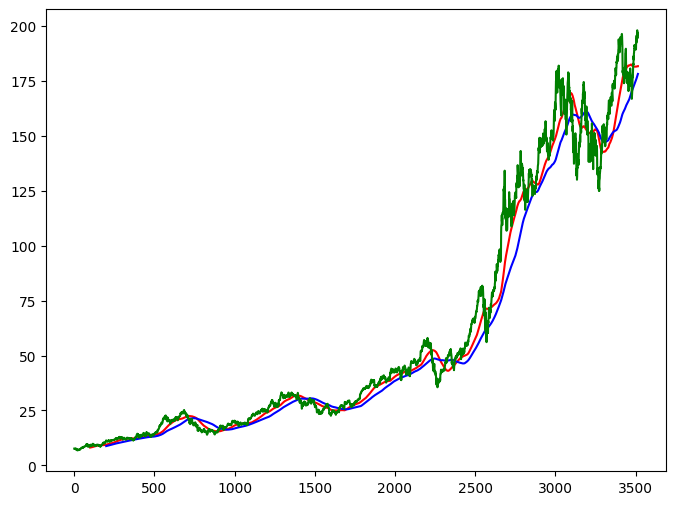

In [43]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [44]:
data.dropna(inplace=True)

In [45]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [46]:
data_train.shape[0]

2812

In [47]:
data_test.shape[0]

704

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [49]:
data_train_scale = scaler.fit_transform(data_train)

In [50]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [51]:
x, y = np.array(x), np.array(y)

In [52]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [53]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

c:\Users\yashr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [56]:
model.fit(x,y, epochs = 100, batch_size =32, verbose =1)

Epoch 1/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 103ms/step - loss: 0.0310
Epoch 2/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - loss: 0.0036
Epoch 3/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - loss: 0.0040
Epoch 4/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - loss: 0.0033
Epoch 5/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - loss: 0.0026
Epoch 6/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - loss: 0.0026
Epoch 7/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - loss: 0.0019
Epoch 8/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - loss: 0.0023
Epoch 9/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - loss: 0.0018
Epoch 10/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - loss: 0.0016
Epoch 11/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - loss: 0.0017
Epoch 12/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - loss: 0.0019
Epoch 13/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - loss: 0.0019
Epoch 14/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - loss: 0.0017
Epoch 15/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s

In [57]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [58]:
pas_100_days = data_train.tail(100)

In [59]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [60]:
data_test_scale  =  scaler.fit_transform(data_test)

In [61]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [62]:
y_predict = model.predict(x)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [63]:
scale =1/scaler.scale_

In [64]:
y_predict = y_predict*scale

In [65]:
y = y*scale

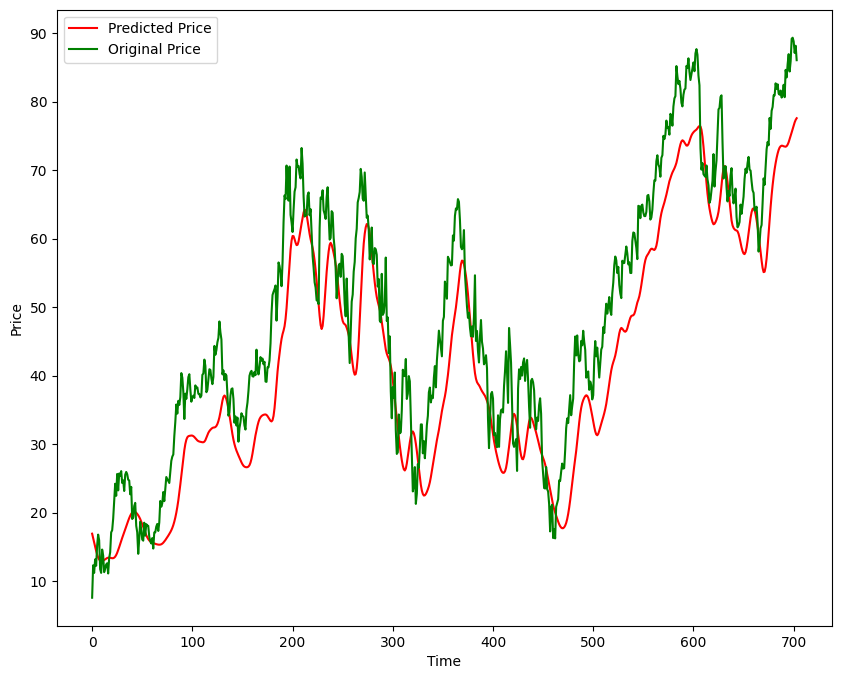

In [66]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [71]:
model.save('D:\Ambitions\Winter 24\PE1\Project\Keras Files\AAPL.keras')

In [68]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378826,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409362,447610800
...,...,...,...,...,...,...,...
3511,2023-12-14,198.020004,199.619995,196.160004,198.110001,197.857529,66831600
3512,2023-12-15,197.529999,198.399994,197.000000,197.570007,197.318222,128256700
3513,2023-12-18,196.089996,196.630005,194.389999,195.889999,195.640350,55751900
3514,2023-12-19,196.160004,196.949997,195.889999,196.940002,196.689026,40714100
